<a href="https://colab.research.google.com/github/AlexCruzS/ProyMLFISI/blob/main/Grupo2_MISDS_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1era forma de cargar un archivo
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTurTSwfXM8rHP-6ZrqgiFP1wT1YdWCl8gx1asEmM9bLAswngSH5iRndgRxLbhBN_N1kgYQ0nRIugCz/pub?gid=911800311&single=true&output=csv')
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


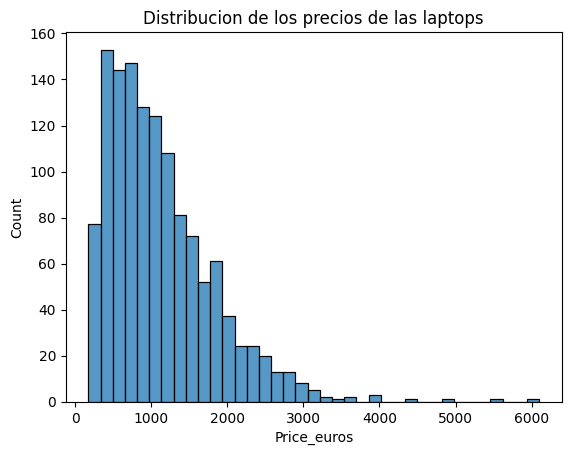

In [ ]:
# 1) EDA

sns.histplot(df['Price_euros'])
plt.title("Distribucion de los precios de las laptops")
plt.show()

Insight 1: debido a que no hay muchos datos de precios de laptops por encima de  2500 euros (especialmente 5000, 6000) el modelo no va entrenar correctamente las predicciones de esos precios.


In [ ]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [ ]:
# Tarea 1:
# Crear cada 1 de las 3 graficas y agregar 1 insight por cada una.
# Relacion de los precios (Price_euros) por compañia (Company) -->
# Relacion de los precios (Price_euros) por tipo de laptop (TypeName) -->
# Relacion de los precios (Price_euros) por tamaño de pantalla (Inches) -->

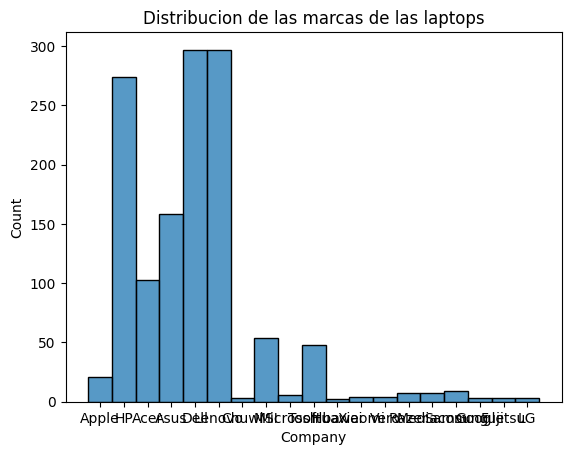

In [ ]:
# 2) EDA

sns.histplot(df['Company'])
plt.title("Distribucion de las marcas de las laptops")
plt.show()

Insight 2. Se tiene pocos datos para ciertas marcas, por debajo de 10 unidades para las marcas: Samsung, Razer, Mediacom, Microsoft, Xiaomi, Vero, Google, Chuwi, Fujitsu, LG, Huawei. Para lo cual el modelo no dara una predicción adecuada


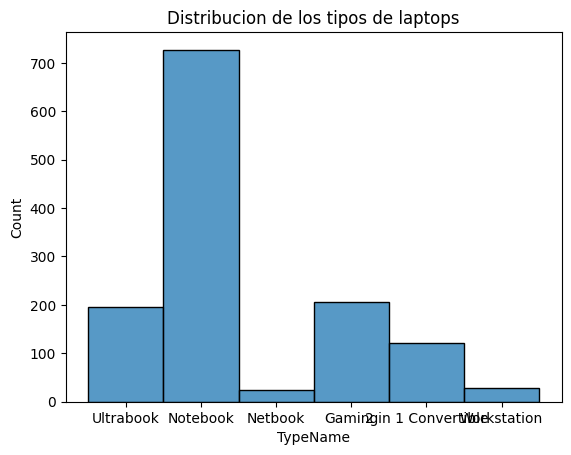

In [ ]:
# 3) EDA

sns.histplot(df['TypeName'])
plt.title("Distribucion de los tipos de laptops")
plt.show()

Insight 3. Se cuenta con pocos datos para los tipos de laptop: Workstation, Netbook menos de 30 datos. Por tanto la precisión del modelo sera limitada para estos.

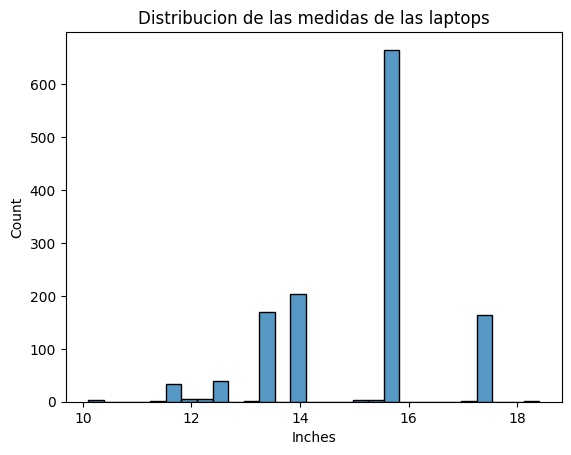

In [ ]:
# 4) EDA

sns.histplot(df['Inches'])
plt.title("Distribucion de las medidas de las laptops")
plt.show()

Insight 4: Se tienen pocos datos para las laptops que tienen medidas: 12, 13.5, 13.9, 12.3, 10.1, 15, 15.4, 13, 18.4, 11.3, 14.1, 17 pulgadas, por tanto el modelo no entrenara correctamente para estas medidas.

In [ ]:
# 2) Data Wrangling

df.isna().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


In [ ]:
'8Kg'.replace("Kg","")

'8'

In [ ]:
# columna Weight

df['Weight'] = df['Weight'].str.replace("kg","").astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [ ]:
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00


In [ ]:
# Memory

df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
len(df['OpSys'].value_counts())

9

In [ ]:
# Tarea 2: 'Ram'  a numerico
df['Ram'] = df['Ram'].str.replace("GB","").astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   float64
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 132.5+ KB


In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


In [ ]:
# Columna "TypeName" (OHE)

df = pd.get_dummies(df, columns=['TypeName'], dtype='int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_ID                    1303 non-null   int64  
 1   Company                      1303 non-null   object 
 2   Product                      1303 non-null   object 
 3   Inches                       1303 non-null   float64
 4   ScreenResolution             1303 non-null   object 
 5   Cpu                          1303 non-null   object 
 6   Ram                          1303 non-null   float64
 7   Memory                       1303 non-null   object 
 8   Gpu                          1303 non-null   object 
 9   OpSys                        1303 non-null   object 
 10  Weight                       1303 non-null   float64
 11  Price_euros                  1303 non-null   float64
 12  TypeName_2 in 1 Convertible  1303 non-null   int64  
 13  TypeName_Gaming   

In [ ]:
df.head(3)

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,1,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,0,0,0,1,0
1,2,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,1,0
2,3,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,1,0,0


In [ ]:
len(df['OpSys'].unique())

9

In [ ]:
# TAREA 2.1: Usar OHE en OpSys
df = pd.get_dummies(df, columns=['OpSys'], dtype='int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_ID                    1303 non-null   int64  
 1   Company                      1303 non-null   object 
 2   Product                      1303 non-null   object 
 3   Inches                       1303 non-null   float64
 4   ScreenResolution             1303 non-null   object 
 5   Cpu                          1303 non-null   object 
 6   Ram                          1303 non-null   float64
 7   Memory                       1303 non-null   object 
 8   Gpu                          1303 non-null   object 
 9   OpSys                        1303 non-null   object 
 10  Weight                       1303 non-null   float64
 11  Price_euros                  1303 non-null   float64
 12  TypeName_2 in 1 Convertible  1303 non-null   int64  
 13  TypeName_Gaming   

In [ ]:
df.head(3)

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,1,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,0,0,0,1,0
1,2,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,1,0
2,3,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,1,0,0


In [ ]:
df[['screen_width', 'screen_height']] = df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype('int')
#Aplica una expresión regular para extraer dos grupos de números y separa ancho - alto

In [ ]:
df.head(3)

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,screen_width,screen_height
0,1,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,0,0,0,1,0,2560,1600
1,2,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,1,0,1440,900
2,3,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,1,0,0,1920,1080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_ID                    1303 non-null   int64  
 1   Company                      1303 non-null   object 
 2   Product                      1303 non-null   object 
 3   Inches                       1303 non-null   float64
 4   ScreenResolution             1303 non-null   object 
 5   Cpu                          1303 non-null   object 
 6   Ram                          1303 non-null   float64
 7   Memory                       1303 non-null   object 
 8   Gpu                          1303 non-null   object 
 9   OpSys                        1303 non-null   object 
 10  Weight                       1303 non-null   float64
 11  Price_euros                  1303 non-null   float64
 12  TypeName_2 in 1 Convertible  1303 non-null   int64  
 13  TypeName_Gaming   

In [ ]:
# TAREA 2.2: Extraer el numero de GHZ y ponerlos en una nueva llamada GHz

In [ ]:
# Extraer el número de GHz desde la columna 'Cpu' y convertirlo a tipo float
df['GHz'] = df['Cpu'].str.extract(r'([\d\.]+)GHz').astype('float')

In [ ]:
df.head(3)

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Price_euros,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,screen_width,screen_height,GHz
0,1,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,1339.69,0,0,0,0,1,0,2560,1600,2.3
1,2,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,898.94,0,0,0,0,1,0,1440,900,1.8
2,3,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,...,575.00,0,0,0,1,0,0,1920,1080,2.5


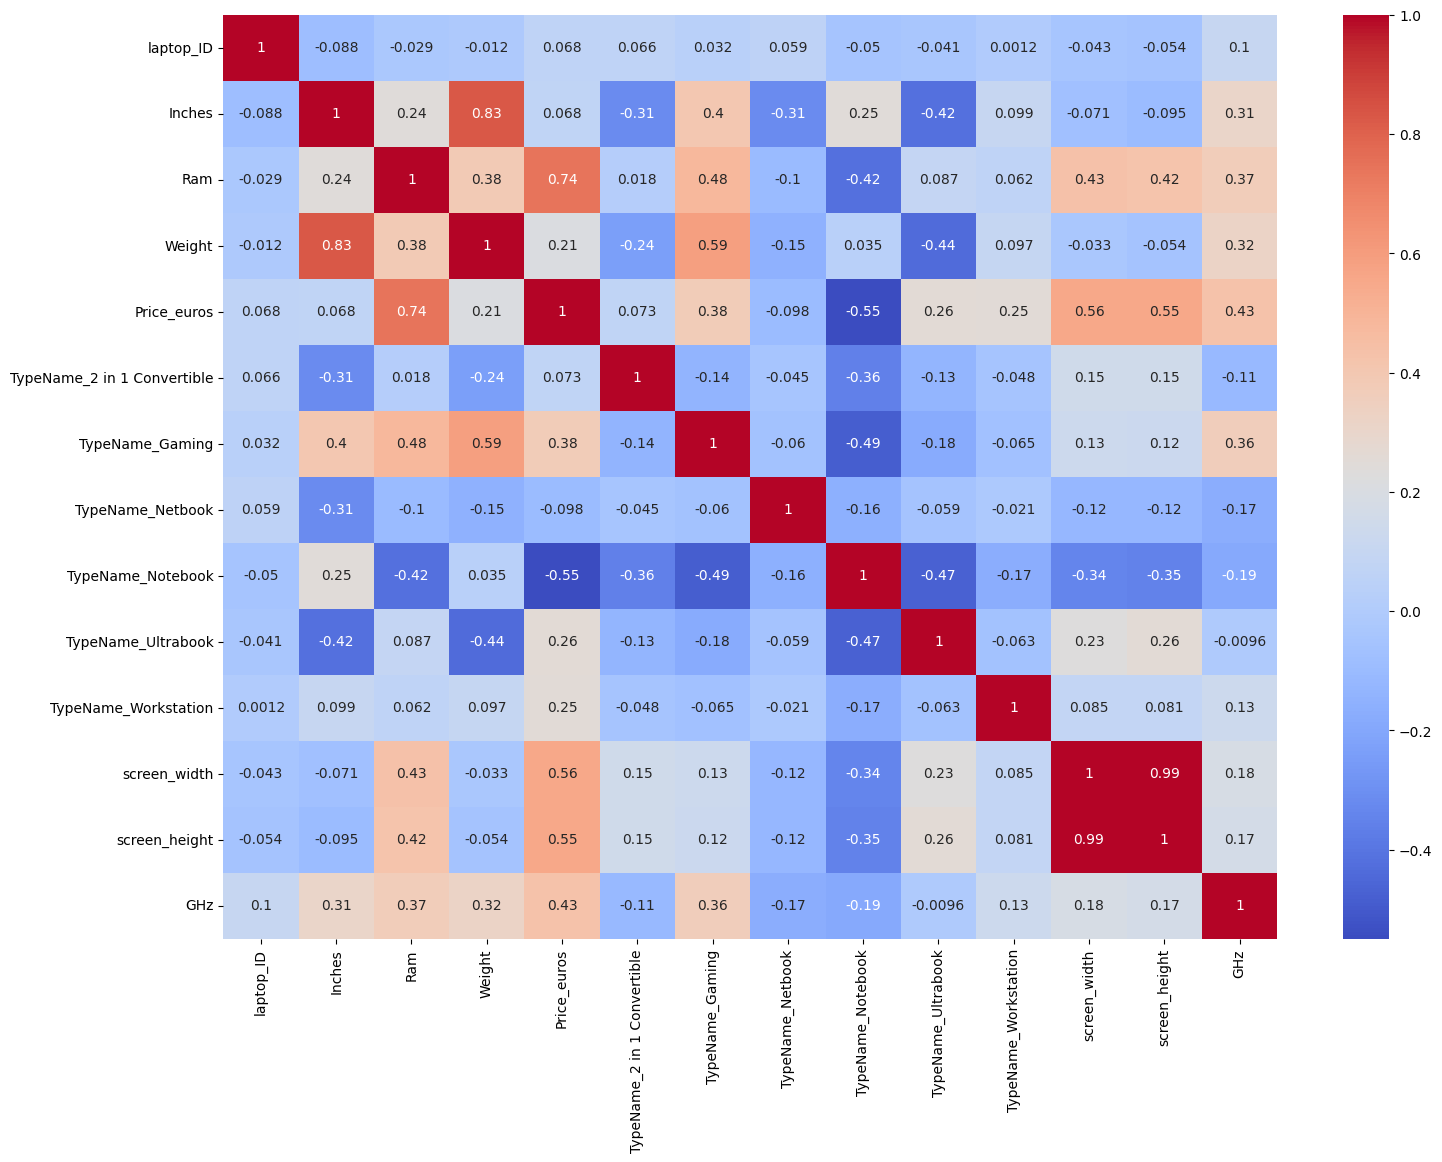

In [ ]:
# Matriz de Correlacion (Mapa de calor)

plt.figure(figsize=(17,12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'screen_width', 'screen_height', 'GHz'],
      dtype='object')

In [ ]:
# Feature Selection

X = df[['screen_width', 'screen_height', 'TypeName_Notebook', 'TypeName_Netbook']]
y = df['Price_euros']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
import sklearn

print(sklearn.__version__)

1.6.1


In [ ]:
# Algoritmo 1: Regresion Lineal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# crear predicciones

y_pred_lr = lr.predict(X_test)

# Evaluacion

from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

MAE: 394.1868655916945
R2: 0.413220910606356


In [ ]:
df['Price_euros'].mean()

np.float64(1123.6869915579432)

In [ ]:
(394/1123) * 100

35.08459483526269

### Evaluacion de Overfitting

In [ ]:
# crear predicciones

y_pred_lr = lr.predict(X_train)

# Evaluacion

from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_train, y_pred_lr))
print("R2:", r2_score(y_train, y_pred_lr))

MAE: 360.9094701336948
R2: 0.48398017217963607


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_absolute_error')

In [ ]:
print("Mejores parámetros encontrados:", grid.best_params_)
print("MAE promedio (CV 5-folds):", -grid.best_score_)

Mejores parámetros encontrados: {'fit_intercept': False, 'positive': False}
MAE promedio (CV 5-folds): 369.5958494526749


In [ ]:
# Tarea 3.1: Usen otros 2 algoritmos para regresion
# - Decision Tree --> from sklearn.tree import DecisionTreeRegressor
# - Random Forest --> from sklearn.ensemble import RandomForestRegressor (Feature importances)
# Entrenar el modelo
# Evaluarlo usando MAE y R2
# Sustentar porque eligieron ese algoritmo  (Explainability, Interpretability, Complexity, etc)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Crear y entrenar el modelo
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predecir
y_pred_dt = dt.predict(X_test)

# Evaluar
print("Árbol de Decisión:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R2:", r2_score(y_test, y_pred_dt))


Árbol de Decisión:
MAE: 392.048874444823
R2: 0.4318570562791443


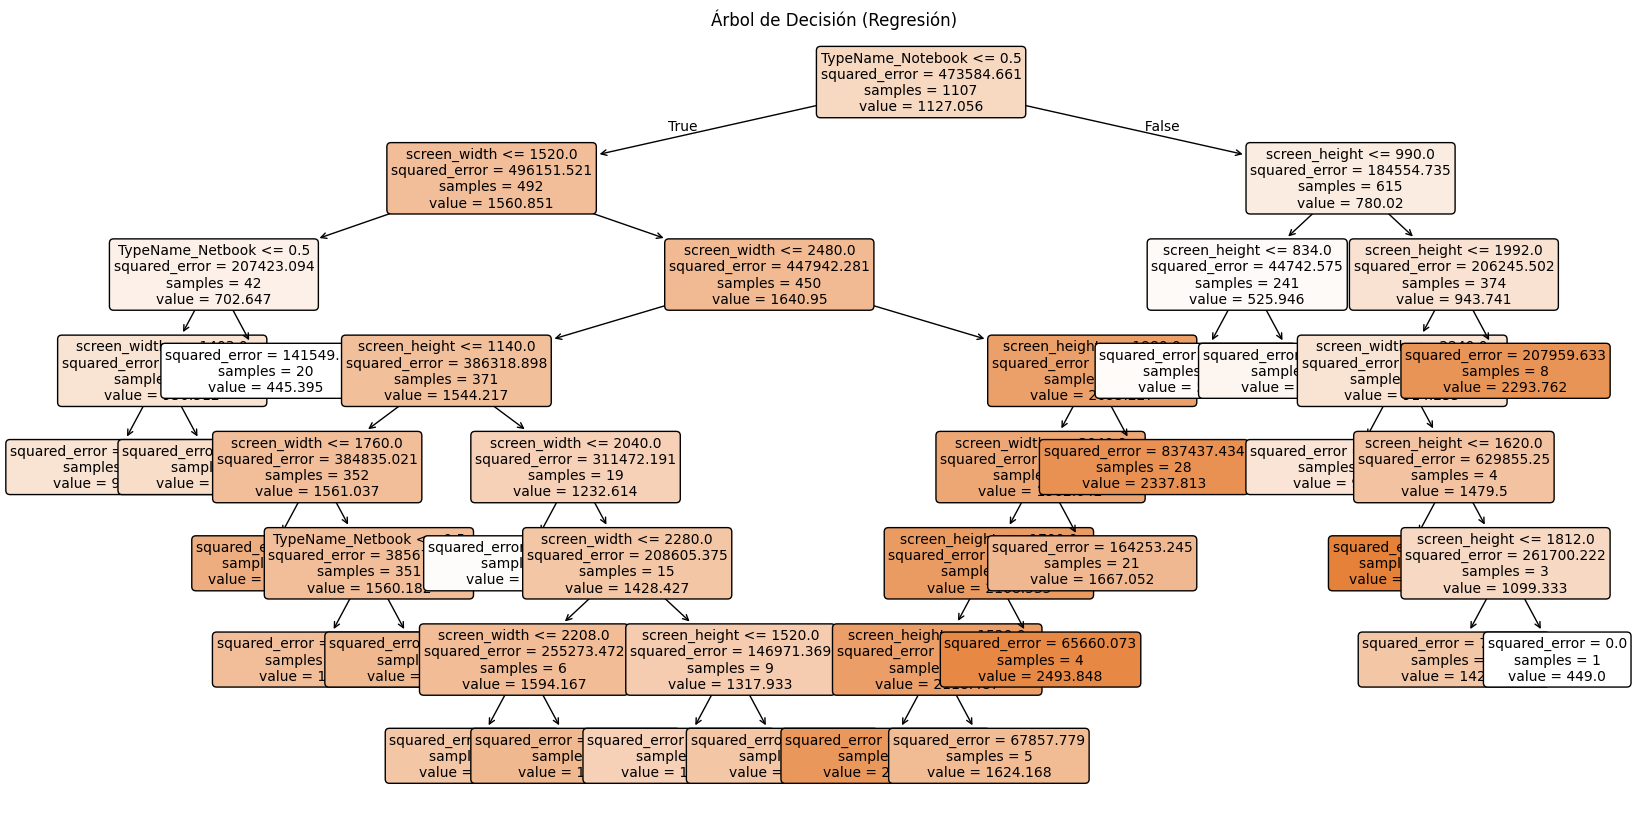

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Graficar el árbol
plt.figure(figsize=(20, 10))
plot_tree(dt,
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión (Regresión)")
plt.show()



Random Forest:
MAE: 391.59438353043
R2: 0.4340463340092343


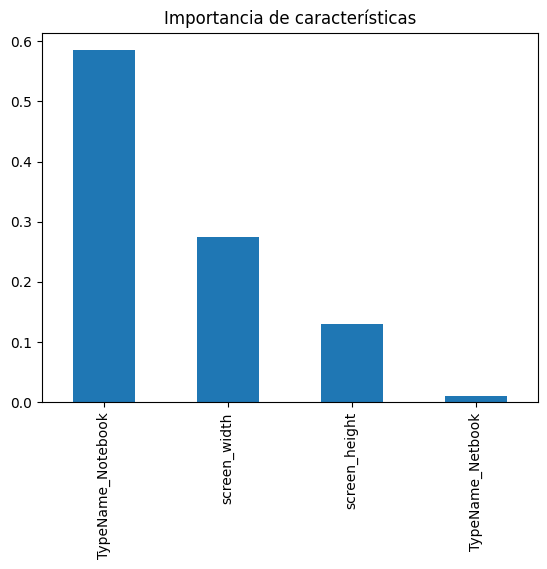

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir
y_pred_rf = rf.predict(X_test)

# Evaluar
print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))

# Importancia de características
import pandas as pd
import matplotlib.pyplot as plt

importancias = pd.Series(rf.feature_importances_, index=X_train.columns)
importancias.sort_values(ascending=False).plot(kind='bar', title='Importancia de características')
plt.show()


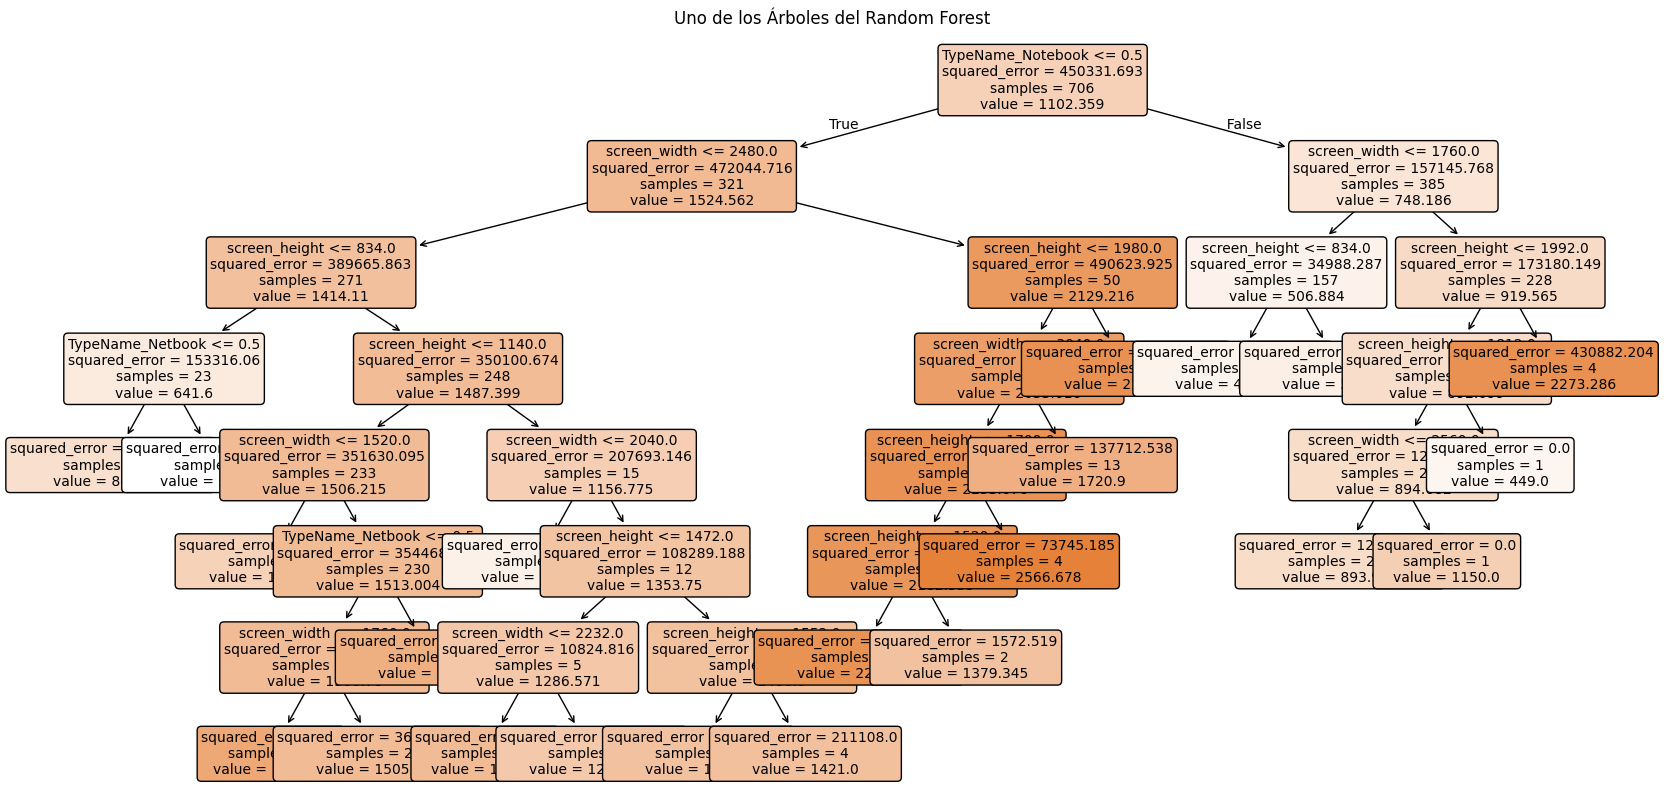

In [ ]:
# Elegir un árbol del bosque, por ejemplo el primero
estimator = rf.estimators_[0]

# Graficar ese árbol individual
plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          max_depth=7,  # Limitar profundidad para claridad
          fontsize=10)
plt.title("Uno de los Árboles del Random Forest")
plt.show()

In [ ]:
import pandas as pd

# Datos de comparación
data = {
    "Criterio": [
        "Interpretabilidad",
        "Explicabilidad",
        "Riesgo de Overfitting",
        "Rendimiento",
        "Complejidad"
    ],
    "Árbol de Decisión": [
        "Fácil de interpretar visualmente",
        "Alta. Cada predicción se puede justificar completamente",
        "Alto. Muy propenso a memorizar los datos",
        "Buen rendimiento en conjuntos simples, pero con dificultad en casos complejos",
        "Modelo ligero, fácil de entender y entrenar"
    ],
    "Random Forest": [
        "Menos interpretable, requiere técnica de importancia de variables",
        "Moderada. Puedes entender qué variables son importantes en promedio",
        "Diseñado para reducir overfitting, el modelo suaviza errores",
        "Más preciso y más estable, aunque con mayor costo computacional",
        "Modelo más complejo, pero mucho más robusto y preciso"
    ]
}

# Crear el DataFrame
df_comparacion = pd.DataFrame(data)

# Mostrar la tabla en consola
print(df_comparacion.to_string(index=False))


             Criterio                                                             Árbol de Decisión                                                       Random Forest
    Interpretabilidad                                              Fácil de interpretar visualmente   Menos interpretable, requiere técnica de importancia de variables
       Explicabilidad                       Alta. Cada predicción se puede justificar completamente Moderada. Puedes entender qué variables son importantes en promedio
Riesgo de Overfitting                                      Alto. Muy propenso a memorizar los datos        Diseñado para reducir overfitting, el modelo suaviza errores
          Rendimiento Buen rendimiento en conjuntos simples, pero con dificultad en casos complejos     Más preciso y más estable, aunque con mayor costo computacional
          Complejidad                                   Modelo ligero, fácil de entender y entrenar               Modelo más complejo, pero mucho más robusto y 

# Conclusión
##El modelo superó ligeramente al Árbol de Decisión tanto en MAE como en R², lo que valida su capacidad para hacer predicciones más precisas manteniendo estabilidad en los resultados. Por tanto el modelo elegido es Random Forest

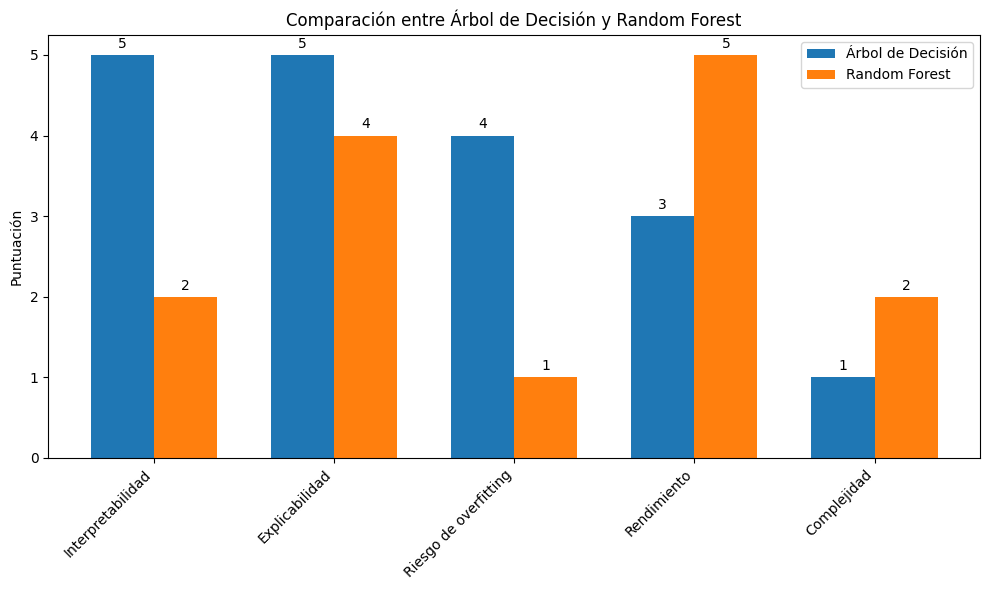

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Criterios a comparar
criterios = [
    "Interpretabilidad",
    "Explicabilidad",
    "Riesgo de overfitting",
    "Rendimiento",
    "Complejidad"
]

# Asignar valores numéricos (del 1 al 5 para estrellas, 1 a 3 para otros)
valores_arbol = [5, 5, 4, 3, 1]  # Árbol de decisión
valores_rf    = [2, 4, 1, 5, 2]  # Random Forest

# Crear posiciones
x = np.arange(len(criterios))
ancho = 0.35

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 6))
barras1 = ax.bar(x - ancho/2, valores_arbol, width=ancho, label='Árbol de Decisión')
barras2 = ax.bar(x + ancho/2, valores_rf, width=ancho, label='Random Forest')

# Etiquetas y títulos
ax.set_ylabel("Puntuación")
ax.set_title("Comparación entre Árbol de Decisión y Random Forest")
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45, ha="right")
ax.legend()

# Mostrar los valores encima de las barras
for barras in [barras1, barras2]:
    for bar in barras:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
